# LSC argon alpha1

## alpha analysis in argon

In [1]:
import time

In [2]:
from __future__ import print_function

In [3]:
%matplotlib inline

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import tables as tb
import numpy as np
import mplFunctions as mpl
import wfmFunctions as wfm
import sensorFunctions as snf
from Util import *
import FEParam as FP
from scipy import signal as SGN

In [7]:
%env PYTHONPATH

'/Users/jjgomezcadenas/Documents/Development/NEXT/IC:/Users/jjgomezcadenas/Documents/Development/NEXT/IC/Cities:/Users/jjgomezcadenas/Documents/Development/NEXT/IC/Notebooks:/Users/jjgomezcadenas/Documents/Development/NEXT/IC/Utilities:/Users/jjgomezcadenas/Documents/Development/NEXT/IC/Sierpe:/Users/jjgomezcadenas/Documents/Development/NEXT/IC/Core:/Users/jjgomezcadenas/Documents/Development/NEXT/CyIC:/usr/local//lib:/usr/local/lib://System/Library/Frameworks/Python.framework/Versions/Current/'

In [8]:
import logging
import sys
logger = logging.getLogger()
logger.handlers[0].stream = sys.stdout
logger.setLevel(logging.DEBUG)

In [9]:
print(time.strftime("%d/%m/%Y"))
print(time.strftime("%H:%M:%S"))

10/10/2016
19:25:15


In [10]:
from alpha_pmt import *

### RUN 2370

In [347]:
!ls /Users/jjgomezcadenas/Documents/Development/NEXT/data/LSC

run_2308.gdc1next.000.next1el_2308.root.h5
run_2308.gdc1next.001.next1el_2308.root.h5
run_2370.gdc1next.000.next1el_2370.root.h5
run_2370.gdc1next.001.next1el_2370.root.h5
run_2370.gdc1next.002.next1el_2370.root.h5
run_2370.gdc1next.003.next1el_2370.root.h5
run_2370.gdc1next.004.next1el_2370.root.h5
run_2370.gdc1next.005.next1el_2370.root.h5
run_2370.gdc1next.006.next1el_2370.root.h5
run_2370.gdc1next.007.next1el_2370.root.h5
run_2370.gdc1next.008.next1el_2370.root.h5
run_2370.gdc1next.009.next1el_2370.root.h5
run_2370.gdc1next.010.next1el_2370.root.h5


In [13]:
h5f =tb.open_file('/Users/jjgomezcadenas/Documents/Development/NEXT/data/LSC/run_2370.gdc1next.000.next1el_2370.root.h5')

In [14]:
h5f

File(filename=/Users/jjgomezcadenas/Documents/Development/NEXT/data/LSC/run_2370.gdc1next.000.next1el_2370.root.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=0, shuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) ''
  description := {
  "x_det": Float32Col(shape=(2,), dflt=0.0, pos=0),
  "y_det": Float32Col(shape=(2,), dflt=0.0, pos=1),
  "z_det": Float32Col(shape=(2,), dflt=0.0, pos=2),
  "r_det": Float32Col(shape=(), dflt=0.0, pos=3)}
  byteorder := 'little'
  chunkshape := (2340,)
/RD (Group) ''
/RD/pmtrwf (EArray(116, 12, 48000), zlib(1)) ''
  atom := Float32Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 1, 32768)
/RD/sipmrwf (EArray(116, 1661, 1200), zlib(1)) ''
  atom := Float32Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 50, 1200)
/Sensors (Group) ''
/Sensors/

In [355]:
gdf

xdet_min   -198.0
xdet_max    198.0
ydet_min   -198.0
ydet_max    198.0
zdet_min      0.0
zdet_max    532.0
R           198.0
dtype: float64

In [17]:
pmtrwf,sipmrwf,pmtdf,sipmdf,gdf = get_vectors(h5f)

In [350]:
pmtdf.ix[0]

,active,adc_to_pes,channel,gain,x,y
0,1,-22.916800,0,0.001641,-23.941401,65.778503
1,1,-25.300800,1,0.001623,68.936501,-12.155400
2,1,-18.212999,4,0.001596,118.916000,141.718002
3,1,-15.855700,5,0.001581,182.188995,32.124901
4,1,-33.099300,12,0.000000,-63.273701,-173.843002
5,1,-22.134001,13,0.000000,-160.214996,-92.500000
6,1,-23.750999,18,0.001618,-44.995098,-53.623100
7,1,-25.998400,19,0.001616,-0.000000,185.000000
8,1,-25.169800,22,0.001599,160.214996,-92.500000
9,1,-20.437700,23,0.001606,63.273701,-173.843002


In [354]:
pmtdf.adc_to_pes.values

array([-22.91679955, -25.30080032, -18.21299934, -15.85569954,
       -33.09930038, -22.13400078, -23.75099945, -25.99839973,
       -25.1697998 , -20.43770027, -20.8927002 , -23.70739937], dtype=float32)

In [327]:
PMT, BSL  = waveform_panel(pmtrwf,pmtdf,calib_constat =True, type = 'PMT', event=0)

In [356]:
PMT.items

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [357]:
PMT[0]

,ene_pes,indx,time_mus
0,0.067462,0.0,0.000
1,-0.019810,1.0,0.025
2,-0.063446,2.0,0.050
3,-0.019810,3.0,0.075
4,0.023826,4.0,0.100
5,0.023826,5.0,0.125
6,0.067462,6.0,0.150
7,0.023826,7.0,0.175
8,-0.019810,8.0,0.200
9,0.023826,9.0,0.225


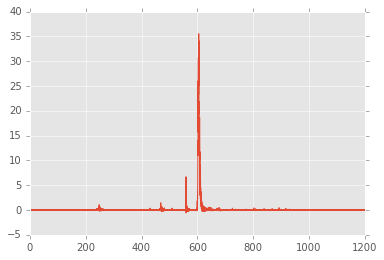

In [359]:
plt.plot(PMT[12].time_mus,PMT[0].ene_pes)

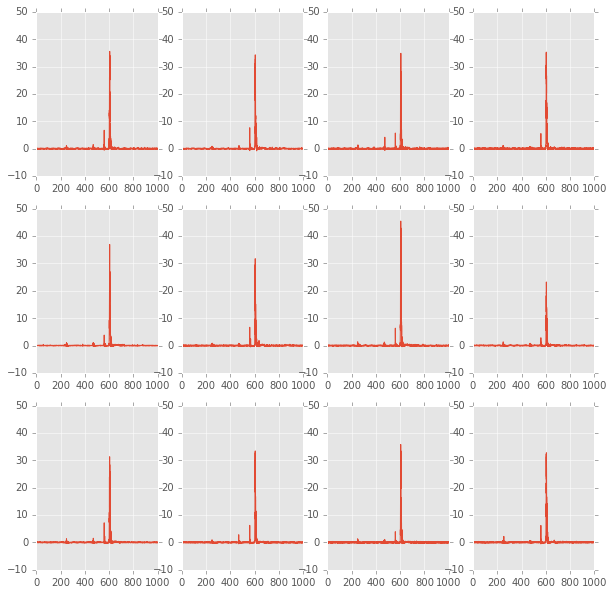

In [328]:
plot_PPMT(PMT, tmin=0, tmax=1000, emin = -10, emax = 50, option='all')

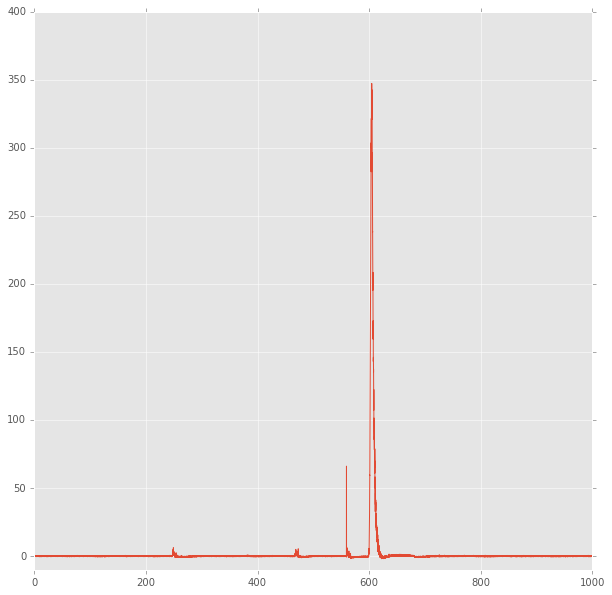

In [329]:
plot_PPMT(PMT, tmin=0, tmax=1000, emin = -10, emax = 400, option='sum')

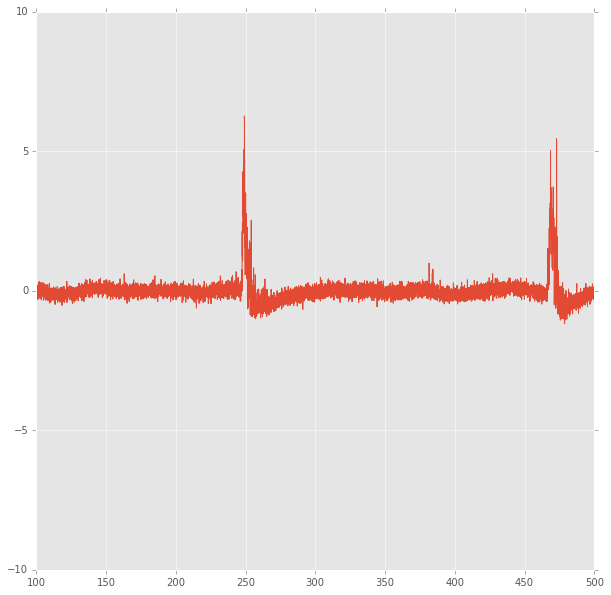

In [330]:
plot_PPMT(PMT, tmin=100, tmax=500, emin = -10, emax = 10, option='sum')

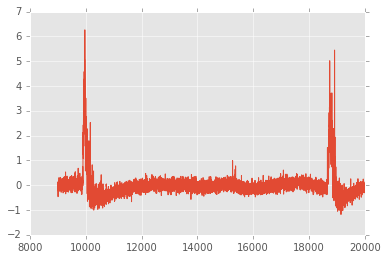

In [339]:
plt.plot(PMT[12].ene_pes[9000:20000])

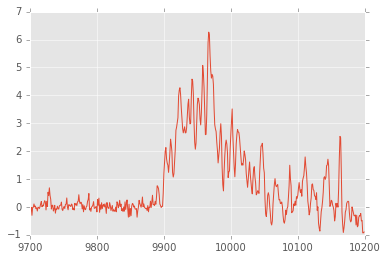

In [341]:
plt.plot(PMT[12].ene_pes[9700:10200])

In [342]:
np.sum(PMT[12].ene_pes[9700:10100])

389.942271951586

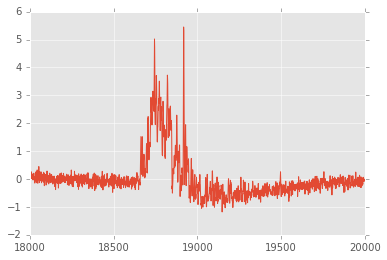

In [343]:
plt.plot(PMT[12].ene_pes[18000:20000])

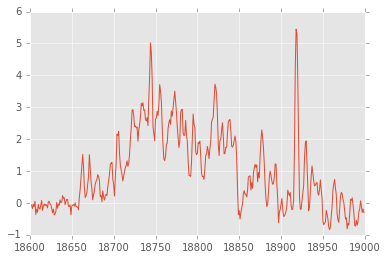

In [344]:
plt.plot(PMT[12].ene_pes[18600:19000])

In [345]:
np.sum(PMT[12].ene_pes[18700:19000])

374.96743075177073

In [346]:
389./374

1.0401069518716577

In [27]:
PMT, BSL  = waveform_panel(pmtrwf,pmtdf,calib_constat =True, type = 'PMT', event=1)

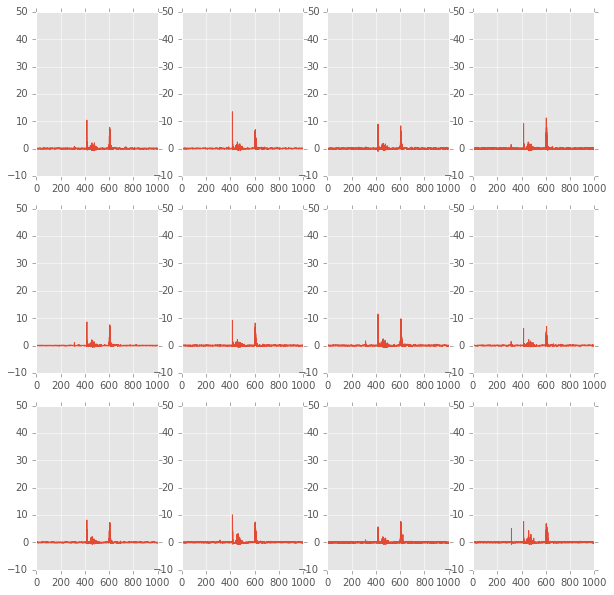

In [28]:
plot_PPMT(PMT, tmin=0, tmax=1000, emin = -10, emax = 50, option='all')

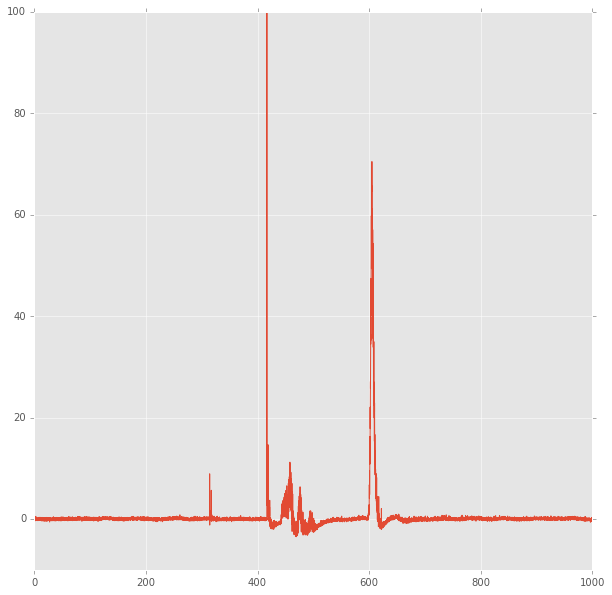

In [30]:
plot_PPMT(PMT, tmin=0, tmax=1000, emin = -10, emax = 100, option='sum')

In [302]:
PMT, BSL  = waveform_panel(pmtrwf,pmtdf,calib_constat =True, type = 'PMT', event=2)

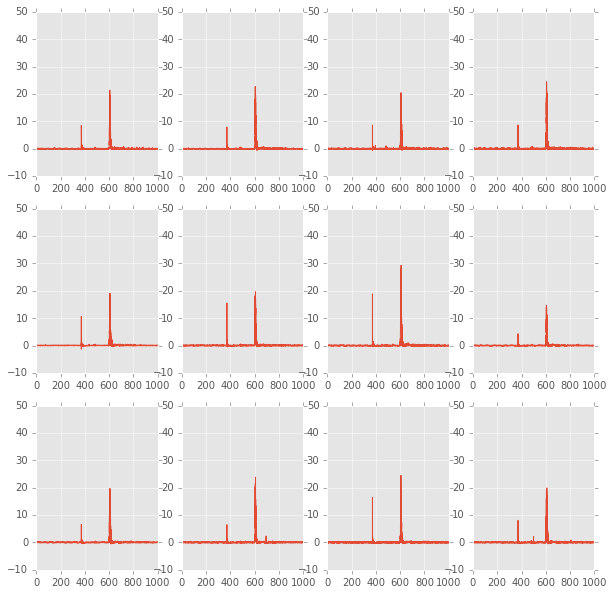

In [303]:
plot_PPMT(PMT, tmin=0, tmax=1000, emin = -10, emax = 50, option='all')

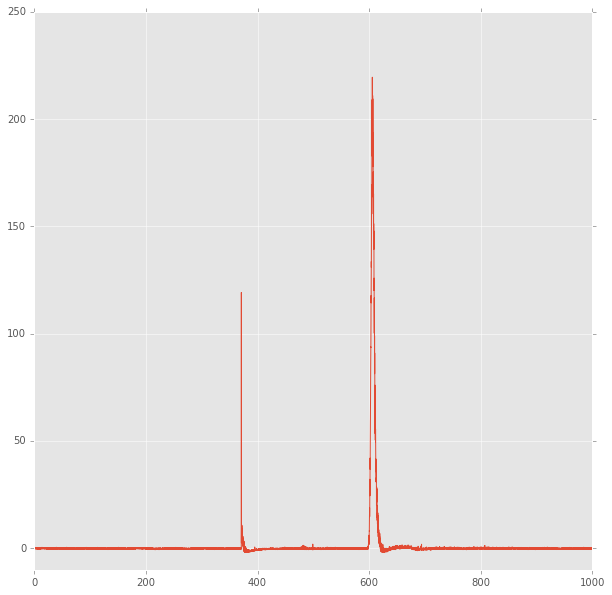

In [304]:
plot_PPMT(PMT, tmin=0, tmax=1000, emin = -10, emax = 250, option='sum')

In [305]:
SIPM, SIBSL  = waveform_panel(sipmrwf,sipmdf,mau_len = 100, calib_constat =True, type = 'SIPM', event=2)

In [306]:
esipm = energy_sum(SIPM, thr=2)

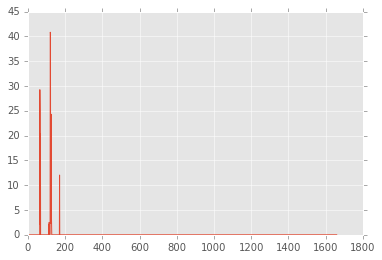

In [307]:
plt.plot(esipm)

In [308]:
esipmzs = esipm.loc[lambda df: df.values >2]

In [309]:
esipmzs

64     29.253756
65     24.884180
66      2.103307
67     20.411056
112     2.071797
114     2.502468
120    40.834585
121    40.563436
122     2.328233
123    21.827093
124    17.236358
125    24.302753
126     4.421043
127     2.045115
170    12.044049
dtype: float64

In [312]:
def sipm_corona(esipmzs, sipmdf, n=2):
    pitch = 10*mm
    sipm_max = esipmzs.loc[lambda df: df.values == df.describe().max()]
    
    imax = sipm_max.index[0]
    xmax = sipmdf.ix[imax].x
    ymax = sipmdf.ix[imax].y
    
    CRNA = []
    ALL = []
    
    print('sipmmax = {}, x = {} mm y = {} mm'.format(imax,xmax,ymax))
    xr = np.arange(xmax - n*pitch, xmax + (n+1)*pitch, pitch)
    yr = np.arange(ymax - n*pitch, ymax + (n+1)*pitch, pitch)
    print('xr = {}, yr ={}'.format(xr,yr))
        
    for isipm in esipmzs.index:
        x = sipmdf.ix[isipm].x
        y = sipmdf.ix[isipm].y
        print('sipm = {}, x = {} mm y = {} mm'.format(isipm,x,y))
        
        ALL.append(isipm)
        if x in xr and y in yr:
            CRNA.append(isipm)
            
    print('CRNA  = {}'.format(CRNA))
    print('ALL = {}'.format(ALL))
    
    left = np.setdiff1d(np.array(ALL),np.array(CRNA))
    print('left = {}'.format(left))
    
    xb = 0.
    yb = 0.
    etot = 0.
    for i in CRNA:
        x = sipmdf.ix[i].x
        y = sipmdf.ix[i].y
        e = esipmzs.ix[i]
        xb += x*e
        yb += y*e
        etot+=e
    
    xb/=etot
    yb/=etot
    print('xb = {}, yb = {}'.format(xb,yb))
    return xb,yb
        
    
    

In [313]:
sipm_corona(esipmzs, sipmdf)

sipmmax = 120, x = -165.0 mm y = -35.0 mm
xr = [-185. -175. -165. -155. -145.], yr =[-55. -45. -35. -25. -15.]
sipm = 64, x = -235.0 mm y = -35.0 mm
sipm = 65, x = -235.0 mm y = -25.0 mm
sipm = 66, x = -235.0 mm y = -15.0 mm
sipm = 67, x = -235.0 mm y = -5.0 mm
sipm = 112, x = -175.0 mm y = -35.0 mm
sipm = 114, x = -175.0 mm y = -15.0 mm
sipm = 120, x = -165.0 mm y = -35.0 mm
sipm = 121, x = -165.0 mm y = -25.0 mm
sipm = 122, x = -165.0 mm y = -15.0 mm
sipm = 123, x = -165.0 mm y = -5.0 mm
sipm = 124, x = -165.0 mm y = 5.0 mm
sipm = 125, x = -165.0 mm y = 15.0 mm
sipm = 126, x = -165.0 mm y = 25.0 mm
sipm = 127, x = -165.0 mm y = 35.0 mm
sipm = 170, x = -185.0 mm y = -95.0 mm
CRNA  = [112, 114, 120, 121, 122]
ALL = [64, 65, 66, 67, 112, 114, 120, 121, 122, 123, 124, 125, 126, 127, 170]
left = [ 64  65  66  67 123 124 125 126 127 170]
xb = -165.518033813, yb = -29.3120562825


(-165.5180338131286, -29.312056282481336)

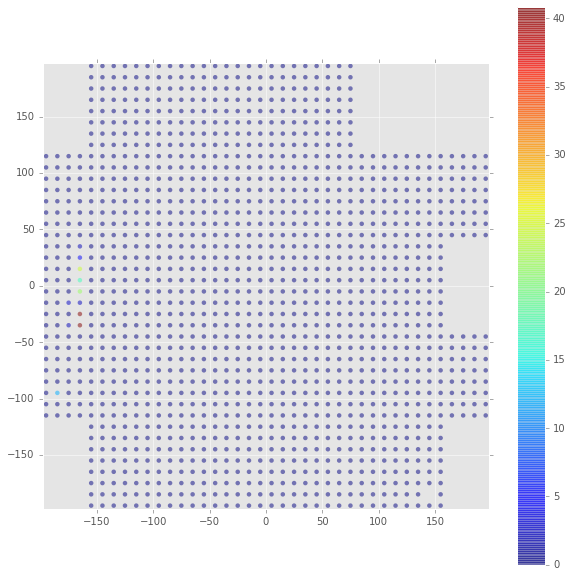

In [314]:
plot_sensors(gdf,sipmdf, esipm, radius=2)

In [315]:
SIPM

<class 'pandas.core.panel.Panel'>
Dimensions: 1662 (items) x 1200 (major_axis) x 3 (minor_axis)
Items axis: 0 to 1661
Major_axis axis: 0 to 1199
Minor_axis axis: ene_pes to time_mus

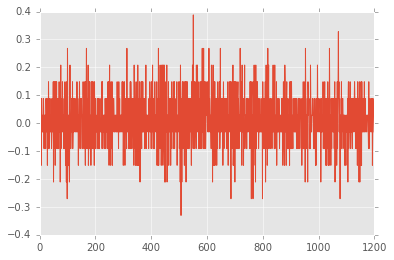

In [316]:
plt.plot(SIPM[0].time_mus, SIPM[0].ene_pes)

In [317]:
SIPM[0].describe()

,ene_pes,indx,time_mus
count,1200.000000,1200.000000,1200.000000
mean,0.013126,599.500000,599.500000
std,0.098774,346.554469,346.554469
min,-0.330590,0.000000,0.000000
25%,-0.031143,299.750000,299.750000
50%,0.028747,599.500000,599.500000
75%,0.088637,899.250000,899.250000
max,0.388084,1199.000000,1199.000000


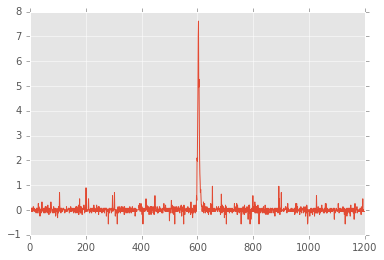

In [318]:
plt.plot(SIPM[120].time_mus, SIPM[120].ene_pes)

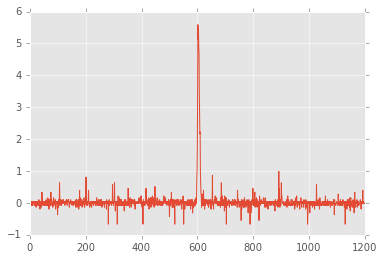

In [301]:
plt.plot(SIPM[121].time_mus, SIPM[121].ene_pes)

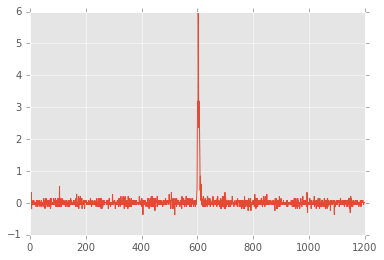

Press a key...


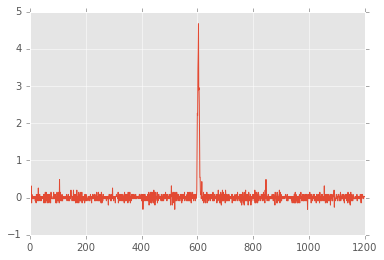

Press a key...


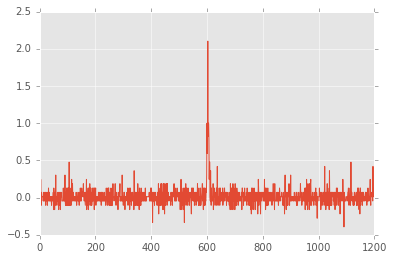

Press a key...


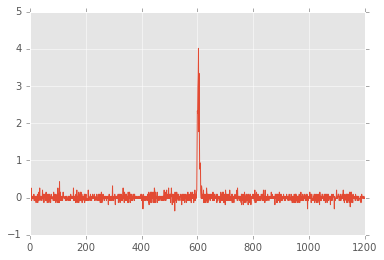

Press a key...


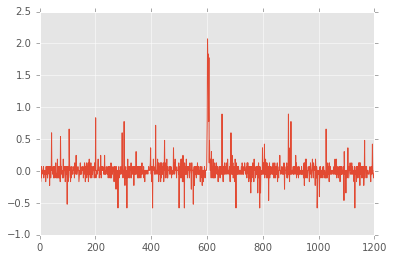

Press a key...


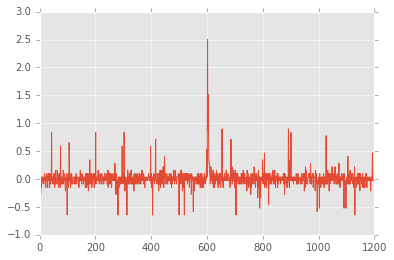

Press a key...


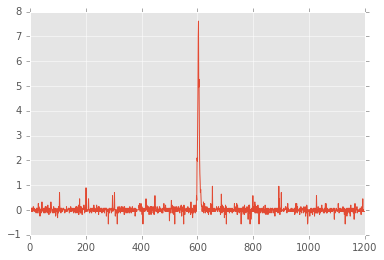

Press a key...


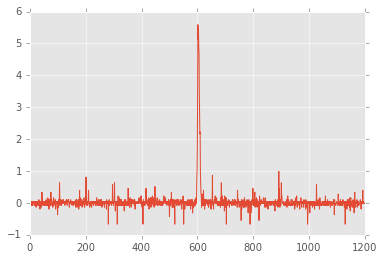

Press a key...


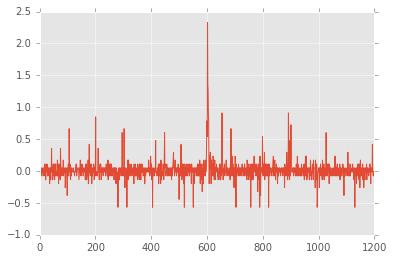

Press a key...


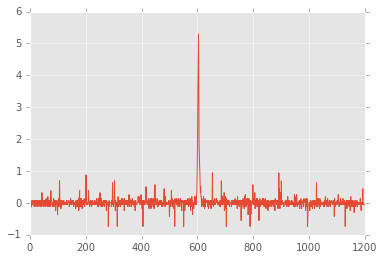

Press a key...


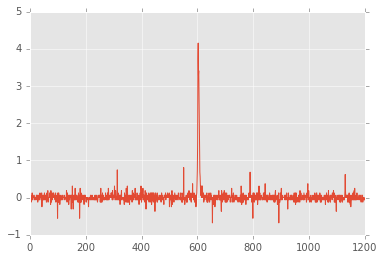

Press a key...


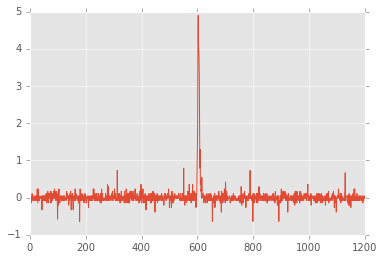

Press a key...


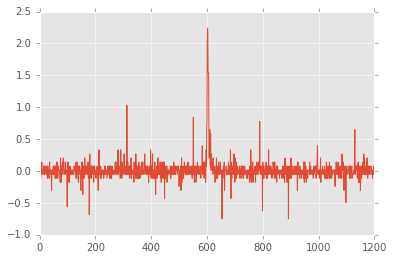

Press a key...


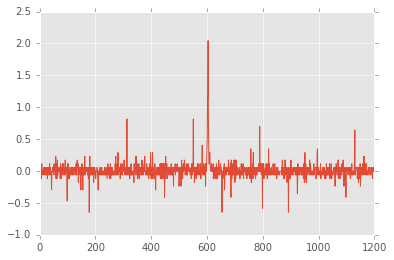

Press a key...


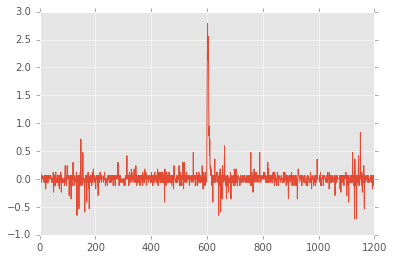

Press a key...


In [319]:
for i in [64, 65, 66, 67, 112, 114, 120, 121, 122, 123, 124, 125, 126, 127, 170]:
    plt.plot(SIPM[i].time_mus, SIPM[i].ene_pes)
    plt.show()
    wait()

In [320]:
s2rb

,ene_pes,indx,time_mus
0,513.966283,24025,600.612500
1,1389.547033,24045,601.612500
2,2960.788933,24065,602.612500
3,4733.091866,24085,603.612500
4,6752.380814,24105,604.612500
5,7873.298691,24125,605.612500
6,7673.709198,24145,606.612500
7,6478.975510,24165,607.612500
8,5375.793304,24185,608.612500
9,3927.207863,24205,609.612500


In [224]:
sipms2 = sipm_s2(SIPM[120], s2rb)

In [225]:
np.sum(sipms2.ene_pes.values)

43.990436971187592

In [226]:
sipms2

,ene_pes,indx,time_mus
601,3.431046,601.0,601.0
602,4.826038,602.0,602.0
603,6.981935,603.0,603.0
604,7.616022,604.0,604.0
605,4.952856,605.0,605.0
606,5.269899,606.0,606.0
607,3.557863,607.0,607.0
608,2.099463,608.0,608.0
609,1.465376,609.0,609.0
610,1.148332,610.0,610.0


In [227]:
sipms2.describe()

,ene_pes,indx,time_mus
count,16.000000,16.000000,16.000000
mean,2.749402,608.500000,608.500000
std,2.520287,4.760952,4.760952
min,0.133792,601.000000,601.000000
25%,0.656914,604.750000,604.750000
50%,1.782419,608.500000,608.500000
75%,4.857742,612.250000,612.250000
max,7.616022,616.000000,616.000000


In [228]:
esipms2 = np.sum(sipms2.ene_pes.values[np.where(sipms2.ene_pes.values > 2.5)])

In [230]:
esipms2

36.635658979415894

In [237]:
SIPM.items

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661],
           dtype='int64', length=1662)

In [ ]:
def sipm_s2(sipmdf, s2df):
    """
    Takes a sipm DF and an s2df
    Returns a DF with the sipm values in the range specified by s2
    """
    s2ti = s2df.time_mus.values[0]
    s2tf = s2df.time_mus.values[-1]
    dfl = sipmdf.loc[lambda df: df.time_mus.values >= s2ti, :]
    dfu = dfl.loc[lambda df: df.time_mus.values < s2tf, :]
    return dfu

In [283]:
def sipm_s2_panel(SIPM, s2df, thr_bin = 2*pes, thr_sipm = 5*pes, event_number=0):
    """
    Takes the sipmrwf and a s2df
    Returns a sipm panel with a collection of sipm DF such that:
    1. the range of the sipm is specified by s2
    2. the sipm energy are above threshold.
    """
    
    DSI = {}
    
    j=0
    
    esipm = energy_sum(SIPM, thr=thr_bin)
    esipmzs = esipm.loc[lambda df: df.values >thr_sipm]
    #return esipmzs
    for i in esipmzs.index:
        sipm = SIPM[i]
        sipm.indx = i
        sipms2 = sipm_s2(sipm, s2df)
        DSI[j] = sipms2
        j+=1
    return pd.Panel(DSI)


In [280]:
esipmzs = sipm_s2_panel(SIPM, s2rb, thr_bin = 2*pes, thr_sipm = 5*pes,event_number=2)

In [281]:
esipmzs

64     29.253756
65     24.884180
67     20.411056
120    40.834585
121    40.563436
123    21.827093
124    17.236358
125    24.302753
170    12.044049
dtype: float64

In [284]:
sipms2 = sipm_s2_panel(SIPM, s2rb, thr_bin = 2*pes, thr_sipm = 5*pes,event_number=2)

In [285]:
sipms2.items

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [300]:
[sipms2[i].indx[602] for i in sipms2.items]

[64.0, 65.0, 67.0, 120.0, 121.0, 123.0, 124.0, 125.0, 170.0]

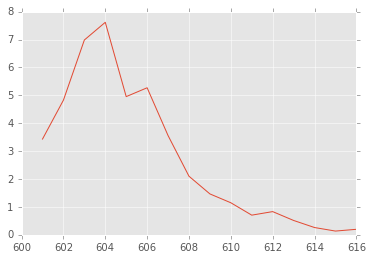

In [293]:
plt.plot(sipms2[3].time_mus,sipms2[3].ene_pes)

In [294]:
np.sum(sipms2[3].ene_pes.values)

43.990436971187592

In [164]:
wf_zs = wf_thr(sPMT(PMT),threshold=7)

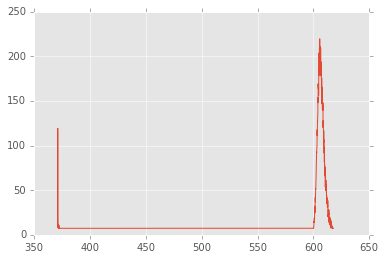

In [168]:
plt.plot(wf_zs.time_mus,wf_zs.ene_pes)

In [166]:
s12 = find_S12(wf_zs)

In [167]:
len(s12)

2

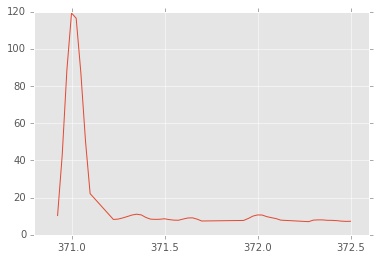

In [177]:
plt.plot(s12[0].time_mus,s12[0].ene_pes)

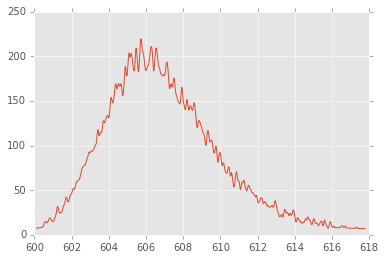

In [178]:
plt.plot(s12[1].time_mus,s12[1].ene_pes)

In [171]:
s1 = s12[0]

In [348]:
s1.describe()

,time_mus,ene_pes,indx
count,47.000000,47.000000,47.000000
mean,371.690426,18.599639,14867.617021
std,0.491519,27.549971,19.660768
min,370.925000,7.068339,14837.000000
25%,371.312500,7.887702,14852.500000
50%,371.600000,8.620846,14864.000000
75%,372.087500,10.488307,14883.500000
max,372.500000,119.226631,14900.000000


In [172]:
s2 = s12[1]

In [173]:
s2rb = rebin_waveform(s2, stride = 40)

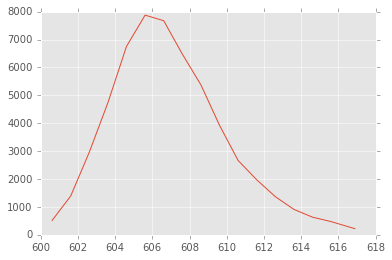

In [174]:
plt.plot(s2rb['time_mus'], s2rb['ene_pes'])

In [175]:
print("ene s2 = {} pes; ene s2rb = {} pes (must be the same)".format(np.sum(s2.ene_pes.values), 
                                                                     np.sum(s2rb.ene_pes.values)))

ene s2 = 55920.51475 pes; ene s2rb = 55920.51475 pes (must be the same)


In [176]:
print("t0 = {} mus".format(find_t0(s1).time_mus.values[0]))

t0 = 371.0 mus


In [182]:
ts2, emaxs2 = s12_peak(s2)

In [51]:
print("ts2 = {} mus, emax = {} pes".format(ts2,emaxs2))

ts2 = 514.2025 mus, emax = 5595.15982056 pes


In [183]:
print('tint = {} mus '.format(find_t(s1,s2)))

tint = 246.775 mus 


### SiPMs

In [131]:
SIPM, SIBSL  = waveform_panel(sipmrwf,sipmdf,mau_len = 100, calib_constat =False, adc_to_pes=20, type = 'SIPM', event=0)

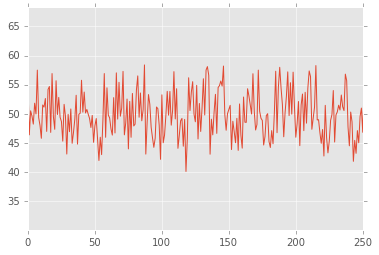

In [132]:
mpl.plts(SIBSL, signal_start=0, signal_end=250, offset=10)

In [133]:
SIBSL.describe()

count    256.000000
mean      49.987266
std        3.973787
min       40.140000
25%       46.982500
50%       49.780000
75%       52.950000
max       58.410000
dtype: float64

In [134]:
SIPM

<class 'pandas.core.panel.Panel'>
Dimensions: 257 (items) x 1000 (major_axis) x 3 (minor_axis)
Items axis: 0 to 256
Major_axis axis: 0 to 999
Minor_axis axis: ene_pes to time_mus

In [183]:
esipmdf = sipm_s2_energy(SIPM, s2, thr_min=25, thr_s2 =2.0)

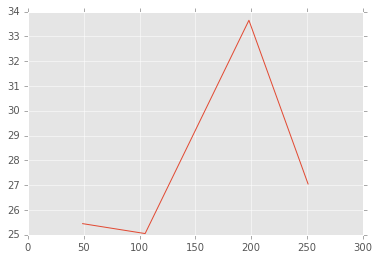

In [144]:
plt.plot(esipmdf.sipm_indx,esipmdf.etot_pes)

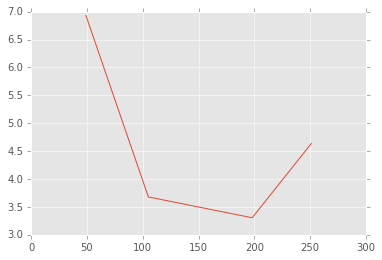

In [145]:
plt.plot(esipmdf.sipm_indx,esipmdf.es2_pes)

In [146]:
esipmdf

,sipm_indx,etot_pes,es2_pes
0,49,25.450031,6.931001
1,105,25.049954,3.678499
2,198,33.650091,3.305502
3,251,27.049993,4.636000


In [156]:
epmt = energy_sum(PMT, thr=0)

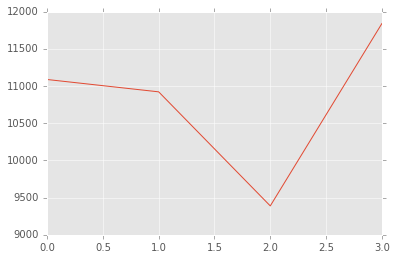

In [157]:
plt.plot(epmt)

In [158]:
esipm = energy_sum(SIPM, thr=0)

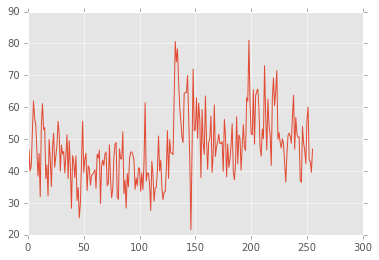

In [159]:
plt.plot(esipm)

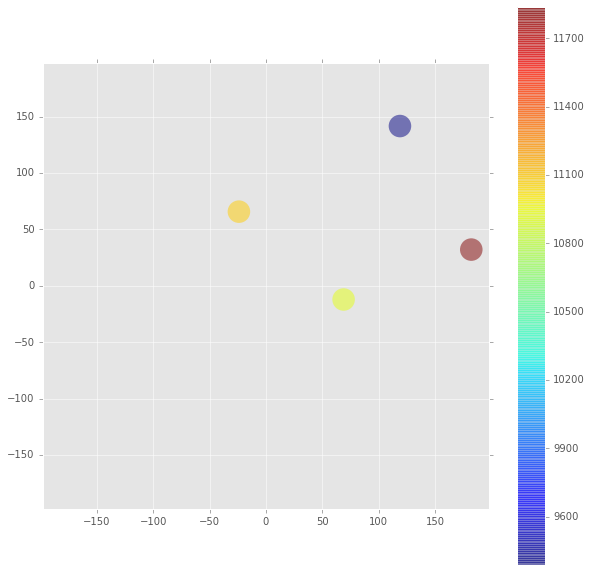

In [160]:
plot_sensors(gdf,pmtdf, epmt, radius=10)

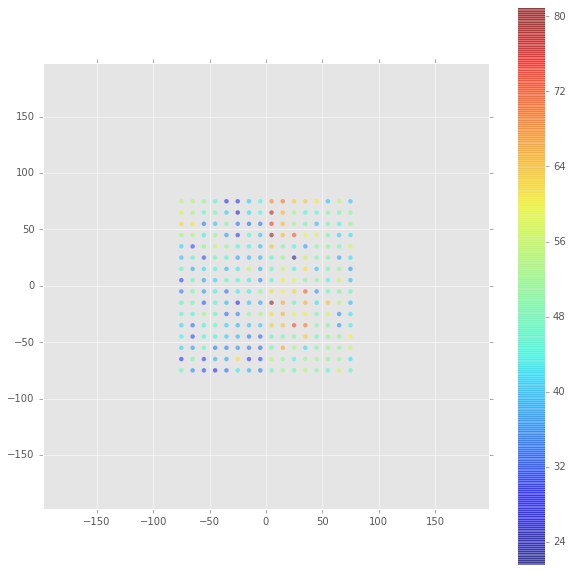

In [161]:
plot_sensors(gdf,sipmdf, esipm, radius=2)

In [162]:
PMT, BSL  = waveform_panel(pmtrwf,pmtdf,calib_constat =True, type = 'PMT', event=1)

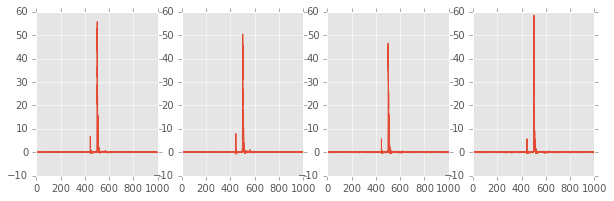

In [165]:
plot_PPMT(PMT, tmin=0, tmax=1000, emin = -10, emax = 60, option='all')

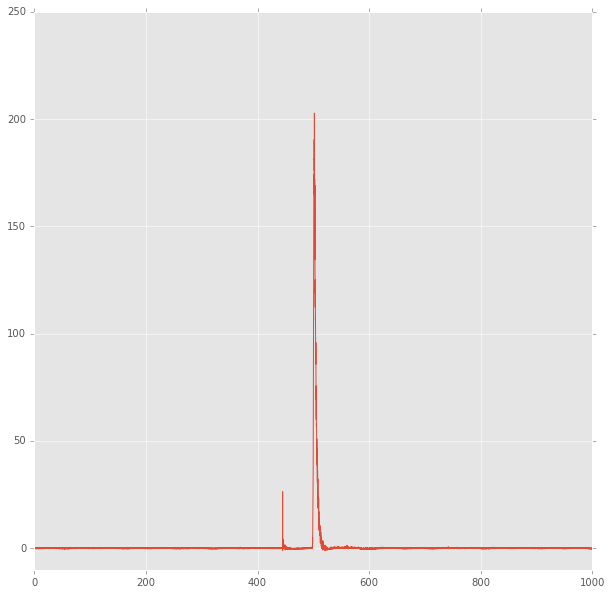

In [166]:
plot_PPMT(PMT, tmin=0, tmax=1000, emin = -10, emax = 250, option='sum')

In [167]:
wf_zs = wf_thr(sPMT(PMT),threshold=6)

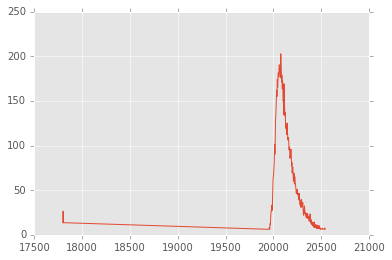

In [168]:
plt.plot(wf_zs.ene_pes)

In [169]:
s12 = find_S12(wf_zs)

In [170]:
len(s12)

2

In [171]:
s1 = s12[0]
s2 = s12[1]

In [172]:
s2rb = rebin_waveform(s2, stride = 40)

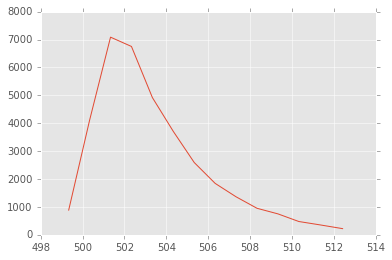

In [173]:
plt.plot(s2rb['time_mus'], s2rb['ene_pes'])

In [174]:
print("ene s2 = {} pes; ene s2rb = {} pes (must be the same)".format(np.sum(s2.ene_pes.values), 
                                                                     np.sum(s2rb.ene_pes.values)))

ene s2 = 35999.8014841 pes; ene s2rb = 35999.8014841 pes (must be the same)


In [175]:
print("t0 = {} mus".format(find_t0(s1).time_mus.values[0]))

t0 = 445.025 mus


In [176]:
ts2, emaxs2 = s2_peak(s2)

In [177]:
print("ts2 = {} mus, emax = {} pes".format(ts2,emaxs2))

ts2 = 512.428448276 mus, emax = 7083.81370544 pes


In [178]:
print('tint = {} mus '.format(find_t(s1,s2)))

tint = 67.4034482759 mus 


In [180]:
SIPM, SIBSL  = waveform_panel(sipmrwf,sipmdf,mau_len = 100, calib_constat =False, adc_to_pes=20, type = 'SIPM', event=1)

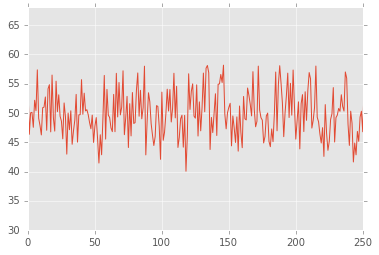

In [181]:
mpl.plts(SIBSL, signal_start=0, signal_end=250, offset=10)

In [186]:
esipmdf = sipm_s2_energy(SIPM, s2, thr_min=0, thr_s2 =0)

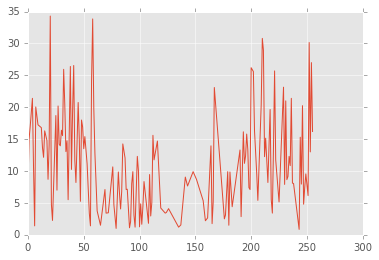

In [187]:
plt.plot(esipmdf.sipm_indx,esipmdf.etot_pes)

### RUN 2366

In [28]:
!ls -lh ../../../waveforms/hdf5/*2366*.h5

-rw-rw-r-- 1 icuser icuser 130M Oct  9 18:28 ../../../waveforms/hdf5/run_2366.gdc1next.000.next1el_2366.root.h5
-rw-rw-r-- 1 icuser icuser 130M Oct  9 18:29 ../../../waveforms/hdf5/run_2366.gdc1next.001.next1el_2366.root.h5
-rw-rw-r-- 1 icuser icuser 130M Oct  9 18:30 ../../../waveforms/hdf5/run_2366.gdc1next.002.next1el_2366.root.h5
-rw-rw-r-- 1 icuser icuser 131M Oct  9 18:30 ../../../waveforms/hdf5/run_2366.gdc1next.003.next1el_2366.root.h5
-rw-rw-r-- 1 icuser icuser 130M Oct  9 18:31 ../../../waveforms/hdf5/run_2366.gdc1next.004.next1el_2366.root.h5
-rw-rw-r-- 1 icuser icuser 130M Oct  9 18:32 ../../../waveforms/hdf5/run_2366.gdc1next.005.next1el_2366.root.h5
-rw-rw-r-- 1 icuser icuser 131M Oct  9 18:33 ../../../waveforms/hdf5/run_2366.gdc1next.006.next1el_2366.root.h5
-rw-rw-r-- 1 icuser icuser 131M Oct  9 18:34 ../../../waveforms/hdf5/run_2366.gdc1next.007.next1el_2366.root.h5
-rw-rw-r-- 1 icuser icuser 130M Oct  9 18:35 ../../../waveforms/hdf5/run_2366.gdc1next.008.next1el_2366.

In [30]:
h5f =tb.open_file('../../../waveforms/hdf5/run_2366.gdc1next.000.next1el_2366.root.h5')

In [31]:
h5f

File(filename=../../../waveforms/hdf5/run_2366.gdc1next.000.next1el_2366.root.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=0, shuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) ''
  description := {
  "x_det": Float32Col(shape=(2,), dflt=0.0, pos=0),
  "y_det": Float32Col(shape=(2,), dflt=0.0, pos=1),
  "z_det": Float32Col(shape=(2,), dflt=0.0, pos=2),
  "r_det": Float32Col(shape=(), dflt=0.0, pos=3)}
  byteorder := 'little'
  chunkshape := (2340,)
/RD (Group) ''
/RD/pmtrwf (EArray(382, 12, 48000), zlib(1)) ''
  atom := Float32Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 1, 32768)
/Sensors (Group) ''
/Sensors/DataPMT (Table(12,)) ''
  description := {
  "channel": Int32Col(shape=(), dflt=0, pos=0),
  "active": Int32Col(shape=(), dflt=0, pos=1),
  "position": Float32Col(shape=(3,), dflt=0.0, pos=2),
  "gain": Float64Col(s

In [35]:
pmtrwf,pmtdf,gdf =get_pmt_vectors(h5f)

In [36]:
PMT, BSL  = waveform_panel(pmtrwf,pmtdf,calib_constat =True, type = 'PMT', event=0)

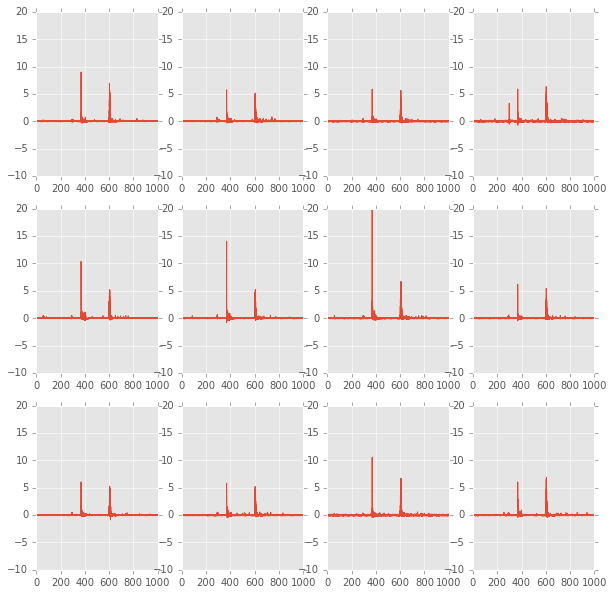

In [39]:
plot_PPMT(PMT, tmin=0, tmax=1000, emin = -10, emax = 20, option='all')

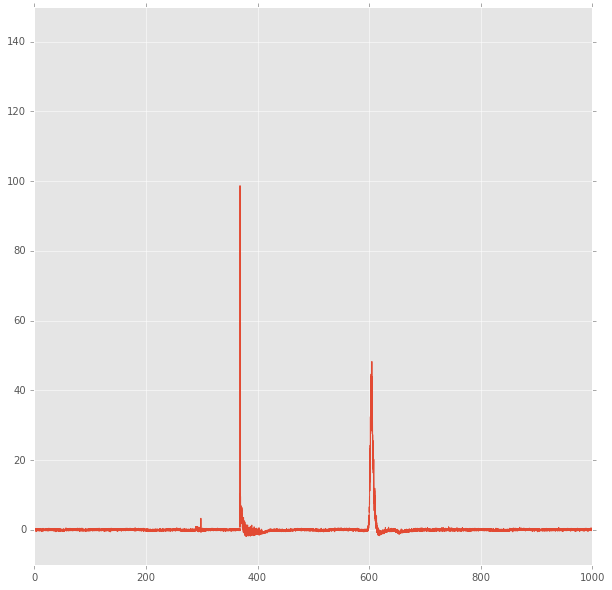

In [57]:
plot_PPMT(PMT, tmin=0, tmax=1000, emin = -10, emax = 150, option='sum')

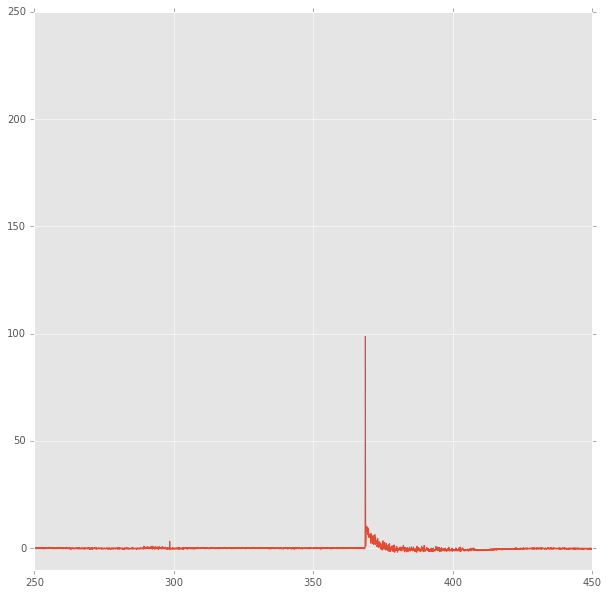

In [42]:
plot_PPMT(PMT, tmin=250, tmax=450, emin = -10, emax = 250, option='sum')

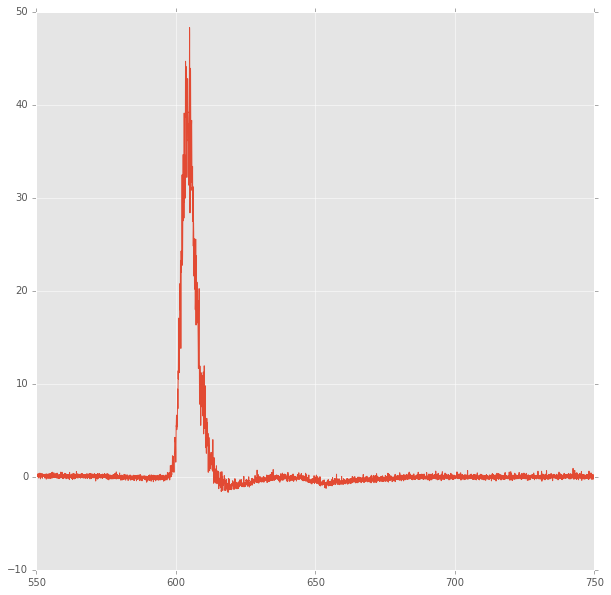

In [45]:
plot_PPMT(PMT, tmin=550, tmax=750, emin = -10, emax = 50, option='sum')

In [104]:
s12 = find_S12(wf_thr(sPMT(PMT),threshold=6))

In [105]:
len(s12)

3

In [54]:
len(s12[0])

64

In [55]:
len(s12[1])

4

In [56]:
len(s12[2])

401

In [58]:
s1 = s12[0]

In [59]:
s2 = s12[2]

In [61]:
np.sum(s2.ene_pes.values)

9285.112699508667

In [62]:
find_t0(s1)

,time_mus,ene_pes,indx
3,368.625,98.711174,14745.0


In [65]:
ts2, emaxs2 = s2_peak(s2)

In [66]:
ts2

611.125

In [68]:
emaxs2

48.295433044433594

In [69]:
find_t(s1,s2)

242.5

In [70]:
epmt = energy_sum(PMT, thr=0)

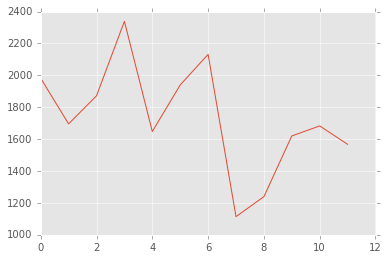

In [71]:
plt.plot(epmt)

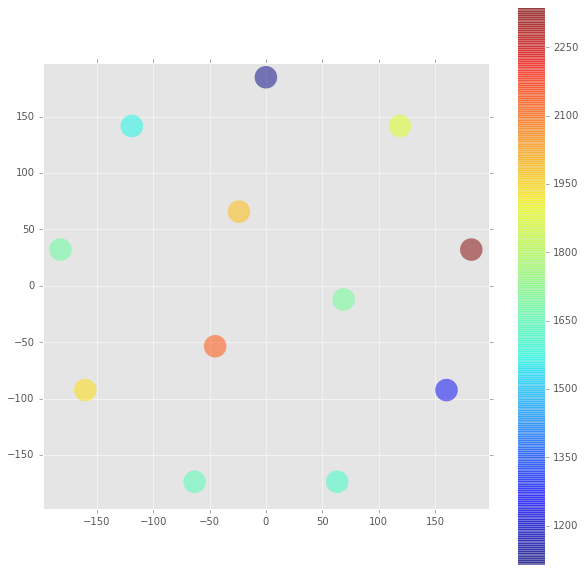

In [72]:
plot_sensors(gdf,pmtdf, epmt, radius=10)

In [73]:
x = pmtdf['x'].values

In [74]:
x

array([ -23.94140053,   68.93650055,  118.91600037,  182.18899536,
        -63.27370071, -160.21499634,  -44.99509811,   -0.        ,
        160.21499634,   63.27370071, -182.18899536, -118.91600037], dtype=float32)

In [76]:
np.dot(x,epmt)/np.sum(epmt)

0.72899437717134452

In [78]:
y = pmtdf['y'].values

In [79]:
np.dot(y,epmt)/np.sum(epmt)

-2.1123627557180513

In [80]:
epmt

0     1982.077915
1     1695.592096
2     1871.691266
3     2338.890845
4     1647.982336
5     1939.618454
6     2131.733983
7     1113.907473
8     1239.179890
9     1619.974036
10    1682.946544
11    1567.643963
dtype: float64

In [100]:
s2.describe()

,time_mus,ene_pes,indx
count,401.000000,401.000000,401.000000
mean,605.388030,23.154895,24215.521197
std,2.927488,11.477493,117.099531
min,600.200000,6.008355,24008.000000
25%,602.875000,11.843847,24115.000000
50%,605.375000,22.265060,24215.000000
75%,607.875000,32.387573,24315.000000
max,611.125000,48.295433,24445.000000


In [101]:
s1.describe()

,time_mus,ene_pes,indx
count,64.000000,64.000000,64.000000
mean,369.553516,13.852556,14782.140625
std,0.631150,19.985552,25.246007
min,368.550000,6.040528,14742.000000
25%,369.068750,6.490131,14762.750000
50%,369.462500,7.577367,14778.500000
75%,370.181250,9.549287,14807.250000
max,370.800000,98.711174,14832.000000


In [124]:
s1.describe().time_mus.max()

370.80000000000001

In [125]:
def pmt_alpha(pmtrwf,pmtdf, geomdf, thr=7*pes, t_trigger = 600, log='INFO', plot=False, event_list=[0]):
    """
    alpha analysis based on PMTs
    """
    lg = 'logging.'+DEBUG
    logger.setLevel(eval(lg))

    evl = len(event_list)
    t0 = np.zeros(evl, dtype=np.float32)
    t = np.zeros(evl, dtype=np.float32)
    xb = np.zeros(evl, dtype=np.float32)
    yb = np.zeros(evl, dtype=np.float32)
    s2e = np.zeros(evl, dtype=np.float32)
    s2l = np.zeros(evl, dtype=np.float32)
    ns1 = np.zeros(evl, dtype=np.int32)
    ns2 = np.zeros(evl, dtype=np.int32)

    for event in event_list:
        logger.info('event = {}'.format(event))

        PMT, BSL  = waveform_panel(pmtrwf,pmtdf,event=event)
        if plot:
            plot_PPMT(PMT, tmin=0, tmax=1000, emin = -10, emax = 20, option='all')
            plt.show()
            wait()
            plot_PPMT(PMT, tmin=0, tmax=1000, emin = -10, emax = 150, option='sum')
            plt.show()
            wait()

        s12 = find_S12(wf_thr(sPMT(PMT),threshold=thr))

        logger.debug('length of s12 = {}'.format(len(s12)))
        S1 = []
        S2 = []
        for s in s12:
            logger.debug('evaluating s in s12: s ={}'.format(s.describe()))
            logger.debug('tmax ={}'.format(s.describe().time_mus.max()))
            if s.describe().time_mus.max() < t_trigger: #s1
                S1.append(s)
            else:
                S2.append(s)

        logger.debug('length of S1 list = {}'.format(len(S1)))
        logger.debug('length of S2 list = {}'.format(len(S2)))

        if (len(S1) == 0):
            logger.warning("S1 not found, ignore event")
            t0[event] = -999
            t[event] = -999
            xb[event] = -999
            yb[event] = -999
            s2e[event] = -999
            s2l[event] = -999
            ns1[event] = 0
            ns2[event] = len(S2)
            continue
        if (len(S2) == 0):
            logger.warning("S2 not found, ignore event")
            t0[event] = -999
            t[event] = -999
            xb[event] = -999
            yb[event] = -999
            s2e[event] = -999
            s2l[event] = -999
            ns1[event] = len(S1)
            ns2[event] = 0
            continue

        ns1[event] = len(S1)
        ns2[event] = len(S2)

        s1 = S1[0]

        if len(S1) > 1:
            cmax = 0
            i=0
            imax = 0
            for s in S1:
                if s.describe().time_mus.count() > cmax:
                    cmax = s.describe().time_mus.count()
                    imax = i
            i+=1
            s1 = S1[imax]

        logger.debug('found s1 = {}'.format(s1.describe()))



        s2 = S2[0]
        es2 = s12_energy(s2)

        if len(S2) > 1:
            emax = 0
            i=0
            imax = 0
            for s in S2:
                es2 = s12_energy(s)
                if es2 > emax:
                    emax =  es2
                    imax = i
            i+=1
            s2 = S2[imax]

        epmt = energy_sum(PMT, thr=0)

        logger.debug('found s2 = {}'.format(s2.describe()))

        t0[event] = find_t0(s1)
        t[event] = find_t(s1,s2)
        xb[event], yb[event] = pmt_barycenter(pmtdf, epmt)
        s2l[event] = s12_length(s2)



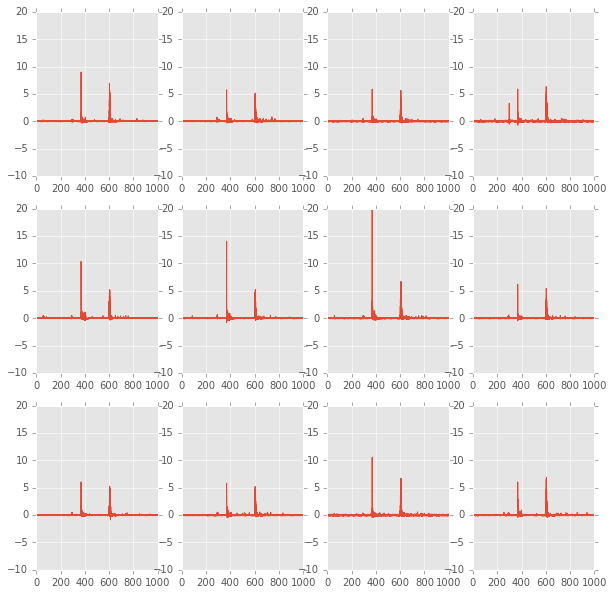

Press a key...


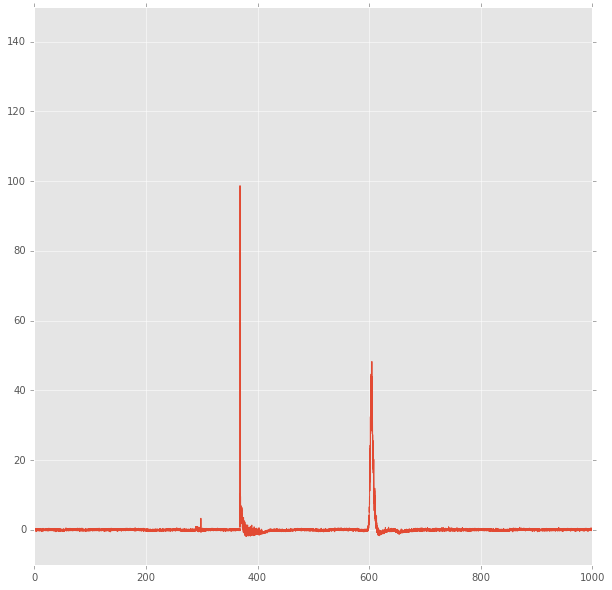

Press a key...
length of s12 = 2
evaluating s in s12: s =         time_mus    ene_pes          indx
count   35.000000  35.000000     35.000000
mean   369.122857  19.947708  14764.914286
std      0.332347  25.605684     13.293898
min    368.550000   7.106111  14742.000000
25%    368.937500   8.540880  14757.500000
50%    369.150000   9.372319  14766.000000
75%    369.362500  10.226789  14774.500000
max    369.650000  98.711174  14786.000000
tmax =<bound method Series.max of count     35.000000
mean     369.122857
std        0.332347
min      368.550000
25%      368.937500
50%      369.150000
75%      369.362500
max      369.650000
Name: time_mus, dtype: float64>
evaluating s in s12: s =         time_mus     ene_pes          indx
count  380.000000  380.000000    380.000000
mean   605.331447   24.080438  24213.257895
std      2.777059   11.073767    111.082378
min    600.575000    7.267888  24023.000000
25%    602.943750   14.383781  24117.750000
50%    605.312500   23.216208  24212.50000

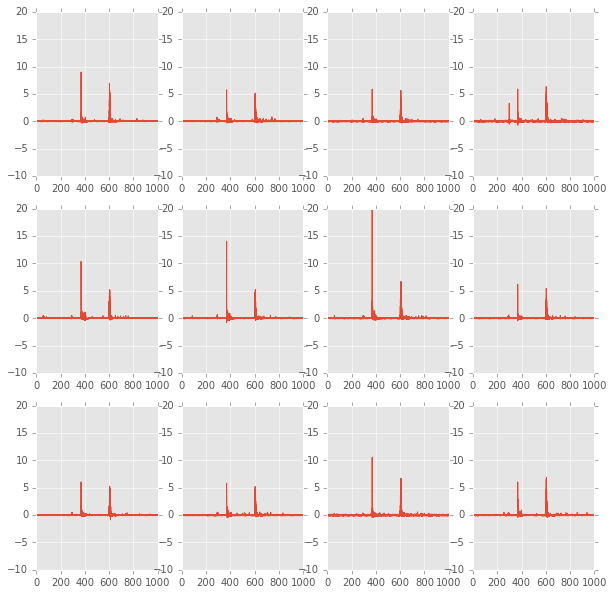

Press a key...


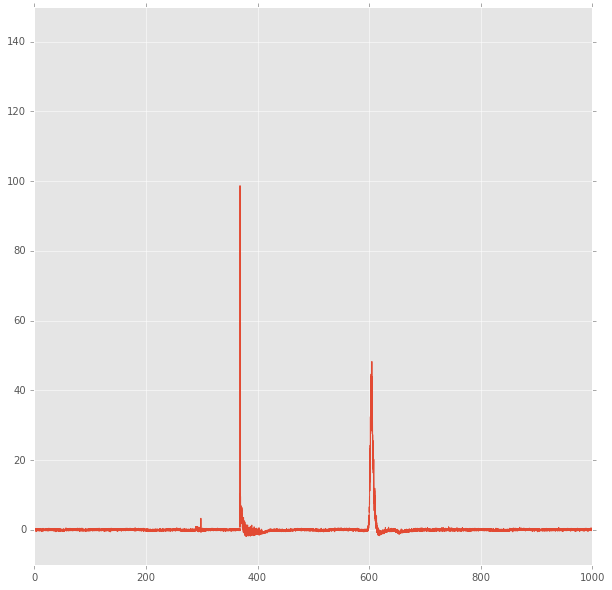

Press a key...
length of s12 = 2
evaluating s in s12: s =         time_mus    ene_pes          indx
count   35.000000  35.000000     35.000000
mean   369.122857  19.947708  14764.914286
std      0.332347  25.605684     13.293898
min    368.550000   7.106111  14742.000000
25%    368.937500   8.540880  14757.500000
50%    369.150000   9.372319  14766.000000
75%    369.362500  10.226789  14774.500000
max    369.650000  98.711174  14786.000000
tmax =<bound method Series.max of count     35.000000
mean     369.122857
std        0.332347
min      368.550000
25%      368.937500
50%      369.150000
75%      369.362500
max      369.650000
Name: time_mus, dtype: float64>
evaluating s in s12: s =         time_mus     ene_pes          indx
count  380.000000  380.000000    380.000000
mean   605.331447   24.080438  24213.257895
std      2.777059   11.073767    111.082378
min    600.575000    7.267888  24023.000000
25%    602.943750   14.383781  24117.750000
50%    605.312500   23.216208  24212.50000

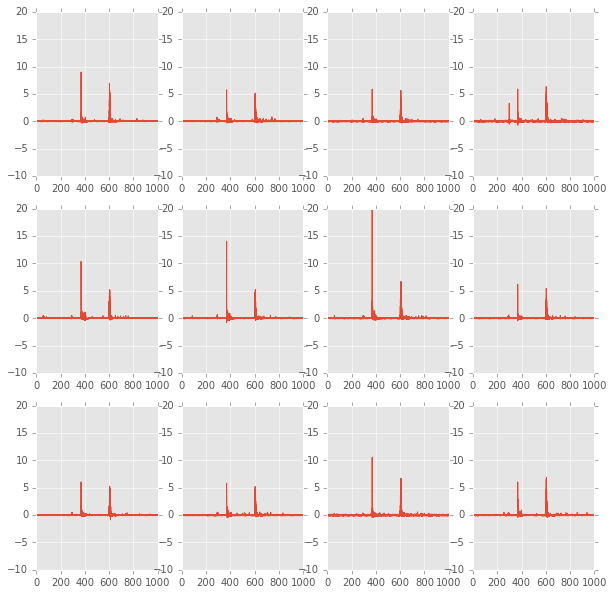

Press a key...


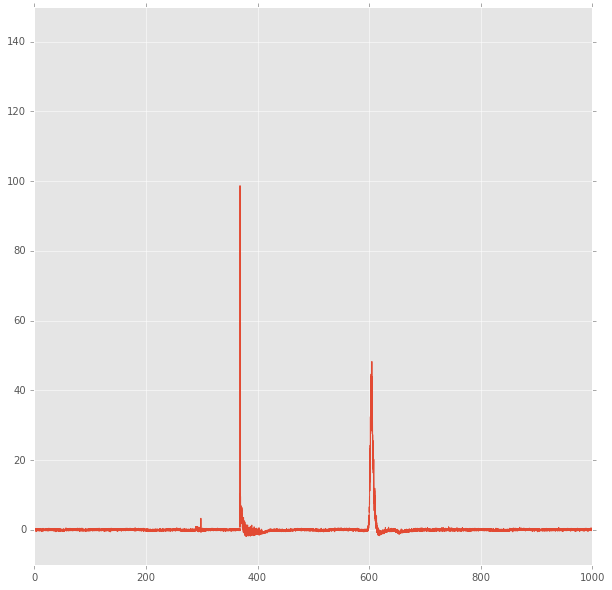

Press a key...
length of s12 = 2
evaluating s in s12: s =         time_mus    ene_pes          indx
count   35.000000  35.000000     35.000000
mean   369.122857  19.947708  14764.914286
std      0.332347  25.605684     13.293898
min    368.550000   7.106111  14742.000000
25%    368.937500   8.540880  14757.500000
50%    369.150000   9.372319  14766.000000
75%    369.362500  10.226789  14774.500000
max    369.650000  98.711174  14786.000000
tmax =<bound method Series.max of count     35.000000
mean     369.122857
std        0.332347
min      368.550000
25%      368.937500
50%      369.150000
75%      369.362500
max      369.650000
Name: time_mus, dtype: float64>
evaluating s in s12: s =         time_mus     ene_pes          indx
count  380.000000  380.000000    380.000000
mean   605.331447   24.080438  24213.257895
std      2.777059   11.073767    111.082378
min    600.575000    7.267888  24023.000000
25%    602.943750   14.383781  24117.750000
50%    605.312500   23.216208  24212.50000

In [126]:
pmt_alpha(pmtrwf,pmtdf,thr=7, t_trigger = 600, event_list=[0,1,2])

In [85]:
xb,yb = pmt_barycenter(gdf,pmtdf, epmt)

In [86]:
print(xb,yb)

0.728994377171 -2.11236275572


In [87]:
s2_length(s2)

10.924999999999955

In [88]:
s2_energy(s2)

9285.112699508667

In [89]:
6./5.

1.2